In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [5]:
crime=crime.rename({'Unnamed: 0':'state'},axis=1)
crime

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime.isna().any()

state       False
Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [7]:
crime[crime.duplicated]

,state,Murder,Assault,UrbanPop,Rape


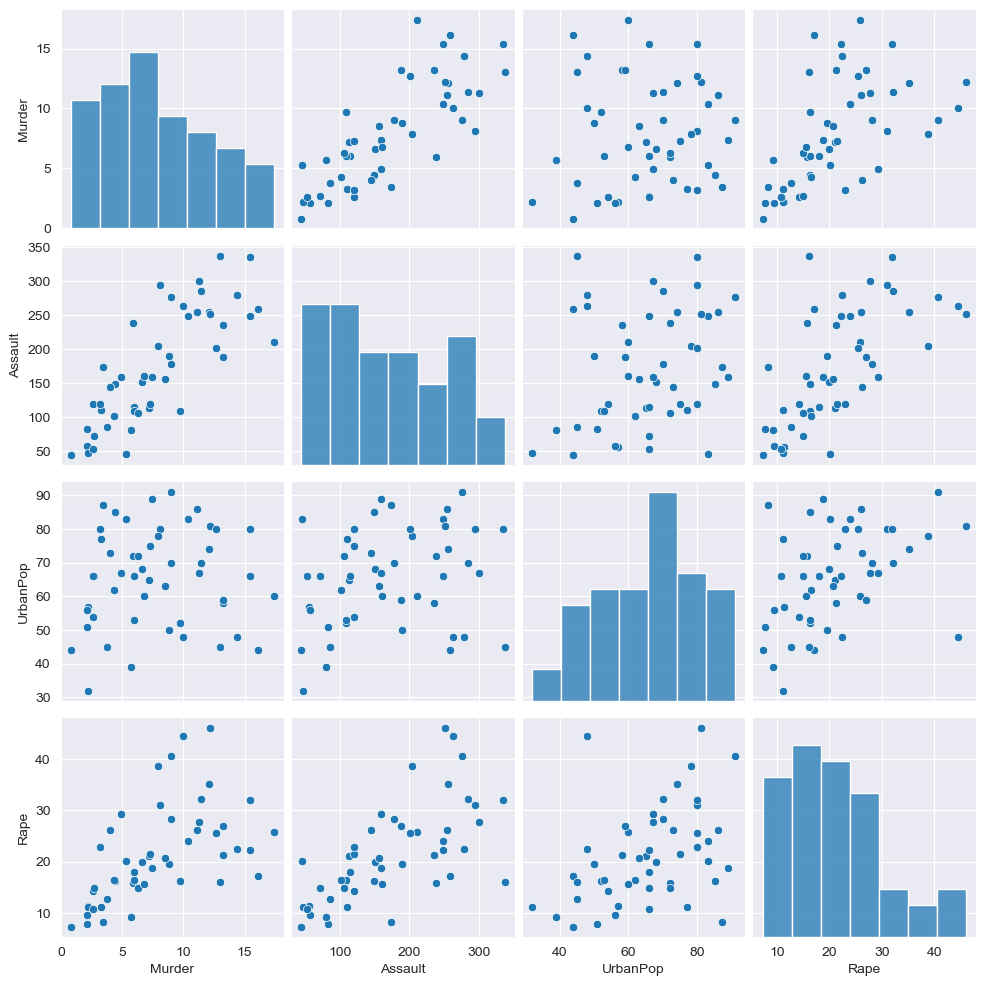

In [8]:
## visualising data
sns.set_style(style='darkgrid')
sns.pairplot(crime)

# Heirarchial Clustering

In [9]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [10]:
x=sc.fit_transform(crime.iloc[:,1:])
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [11]:
from scipy.cluster import hierarchy

In [12]:
hl=hierarchy.linkage(x,method='complete')

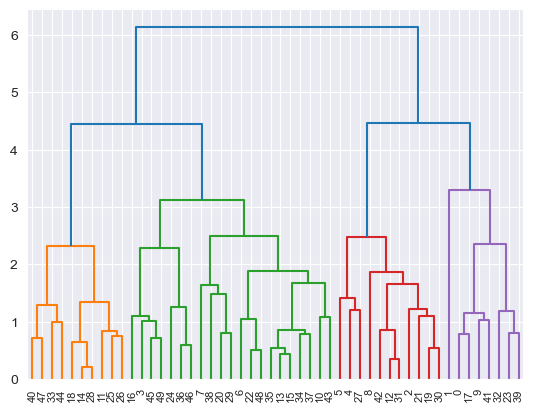

In [13]:
dendrogram=hierarchy.dendrogram(hl)

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc=AgglomerativeClustering(n_clusters=4)

In [16]:
ypred=hc.fit_predict(x)
ypred

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [17]:
crime['cluster']=ypred
crime

,state,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [18]:
# Analysing the data
cc=crime.groupby('cluster').agg('mean')
cc

C:\Users\bivin\AppData\Local\Temp\ipykernel_8700\308487949.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc=crime.groupby('cluster').agg('mean')


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


<Axes: xlabel='cluster'>

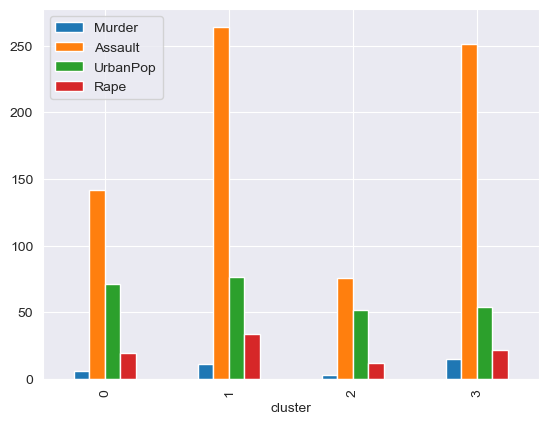

In [19]:
cc.plot(kind='bar')

In [20]:
crime['cluster']=ypred
crime

,state,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [21]:
# silhouette score agglomerative clustering of standarzized data
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(x,ypred)

0.3370187183556962

In [23]:
## it is a average score and the chances for overlapping is getting more when the value coming to zero

In [24]:
# transforming dataset using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
y=mm.fit_transform(crime.iloc[:,1:])
y

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313, 1.        ],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031, 0.33333333],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 , 0.33333333],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548, 0.        ],
       [0.4939759 , 0.79109589, 1.        , 0.86046512, 0.33333333],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951, 0.33333333],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121, 0.        ],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824, 0.        ],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891, 0.33333333],
       [1.        , 0.56849315, 0.47457627, 0.47803618, 1.        ],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333, 0.        ],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457, 0.66666667],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455, 0.33333333],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517, 0.        ],
       [0.08433735, 0.03767123, 0.

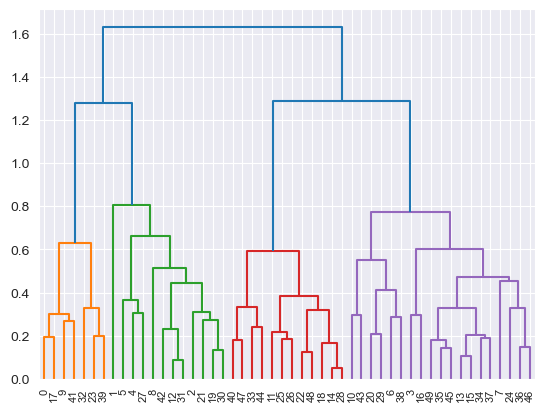

In [25]:
# plotting dendrogram for Normalized data
dend=hierarchy.dendrogram(hierarchy.linkage(y,method='complete'))

In [26]:
predict=hc.fit_predict(y)

In [27]:
# checking silhoutte score
silhouette_score(y,hc.fit_predict(y))
#normaalized dataset has high score comapred to standardized data

0.5426657105013244

In [28]:
crime['cluster1']=predict
crime.head()

,state,Murder,Assault,UrbanPop,Rape,cluster,cluster1
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,1


In [29]:
# states belongs to cluster 0 according to normalized data
crime[crime['cluster1']==0]

,state,Murder,Assault,UrbanPop,Rape,cluster,cluster1
3,Arkansas,8.8,190,50,19.5,0,0
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
10,Hawaii,5.3,46,83,20.2,0,0
13,Indiana,7.2,113,65,21.0,0,0
15,Kansas,6.0,115,66,18.0,0,0
16,Kentucky,9.7,109,52,16.3,0,0
20,Massachusetts,4.4,149,85,16.3,0,0
24,Missouri,9.0,178,70,28.2,0,0
29,New Jersey,7.4,159,89,18.8,0,0


In [30]:
# states belongs to cluster 1 according to normalized data
crime[crime['cluster1']==1]

,state,Murder,Assault,UrbanPop,Rape,cluster,cluster1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
12,Illinois,10.4,249,83,24.0,1,1
19,Maryland,11.3,300,67,27.8,1,1
21,Michigan,12.1,255,74,35.1,1,1
27,Nevada,12.2,252,81,46.0,1,1
30,New Mexico,11.4,285,70,32.1,1,1


In [31]:
# states belongs to cluster 2 according to normalized data
crime[crime['cluster1']==2]

,state,Murder,Assault,UrbanPop,Rape,cluster,cluster1
11,Idaho,2.6,120,54,14.2,2,2
14,Iowa,2.2,56,57,11.3,2,2
18,Maine,2.1,83,51,7.8,2,2
22,Minnesota,2.7,72,66,14.9,2,2
25,Montana,6.0,109,53,16.4,2,2
26,Nebraska,4.3,102,62,16.5,2,2
28,New Hampshire,2.1,57,56,9.5,2,2
33,North Dakota,0.8,45,44,7.3,2,2
40,South Dakota,3.8,86,45,12.8,2,2
44,Vermont,2.2,48,32,11.2,2,2


In [32]:
# states belongs to cluster 3 according to normalized data
crime[crime['cluster1']==3]

,state,Murder,Assault,UrbanPop,Rape,cluster,cluster1
0,Alabama,13.2,236,58,21.2,3,3
9,Georgia,17.4,211,60,25.8,3,3
17,Louisiana,15.4,249,66,22.2,3,3
23,Mississippi,16.1,259,44,17.1,3,3
32,North Carolina,13.0,337,45,16.1,3,3
39,South Carolina,14.4,279,48,22.5,3,3
41,Tennessee,13.2,188,59,26.9,3,3
